In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import HashingVectorizer
import sys
sys.path.append("/Users/fennyzalavadia/Desktop/Verusen_2/tombstone")

from base.services.data_preprocessing.nlp_pre_processing import NLPPreProcessing
nlp = NLPPreProcessing()


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#mat_desc = pd.read_csv("Dataset/query_result_2022-11-17T22_15_15.252605Z.csv")
mat_desc = pd.read_csv("Dataset/Mat_desc.csv")

In [3]:
mat_desc

material_group                              material_descriptions
0              24477  ["RING, CPLG GUIDE SPRING FALK 340588","SEAL K...
1          300408031  ["SUPORTE MONT P/RELE;SIEMENS;3RU19363AA01","S...
2            C69-700  ["HEATER              OVERLOAD","HEATER       ...
3          120402077  ["ANEL;DO ANAL CO2 ANTON;ANTON PAAR/17522","AN...
4            1040100  ["BEARING,BALL NO.1315 #02 (SKF)","BEARING,620...
...              ...                                                ...
20459        C10-290                             ["SCREW, SOCKET HEAD"]
20460        C23-320                      ["BRONZE-SOLID        ROUND"]
20461       27121600  ["2.50CBB2ANLU18AC8.00","DSBC-80-800-PPVA-N3",...
20462  SCREW,DRYWALL  ["SCREW,DRYWALL32158DRY WALL,BUGLE,1.625 IN,",...
20463          69866  ["INDICATOR, BURST 6IN ZOOK BA0150-0150-01","I...

[20464 rows x 2 columns]

In [4]:
mat_desc = mat_desc.merge(mat_grp_mapping,how = 'left',left_on = 'material_group',right_on = 'material_group')
mat_desc.drop(columns = ['Unnamed: 0'],axis = 0,inplace = True)
mat_desc.rename(columns= {'Category L1':'Category'},inplace = True)


In [5]:
mat_desc

material_group                              material_descriptions  \
0              24477  ["RING, CPLG GUIDE SPRING FALK 340588","SEAL K...   
1          300408031  ["SUPORTE MONT P/RELE;SIEMENS;3RU19363AA01","S...   
2            C69-700  ["HEATER              OVERLOAD","HEATER       ...   
3          120402077  ["ANEL;DO ANAL CO2 ANTON;ANTON PAAR/17522","AN...   
4            1040100  ["BEARING,BALL NO.1315 #02 (SKF)","BEARING,620...   
...              ...                                                ...   
20459        C10-290                             ["SCREW, SOCKET HEAD"]   
20460        C23-320                      ["BRONZE-SOLID        ROUND"]   
20461       27121600  ["2.50CBB2ANLU18AC8.00","DSBC-80-800-PPVA-N3",...   
20462  SCREW,DRYWALL  ["SCREW,DRYWALL32158DRY WALL,BUGLE,1.625 IN,",...   
20463          69866  ["INDICATOR, BURST 6IN ZOOK BA0150-0150-01","I...   

      Category  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
20459      NaN  
20460      NaN  
20461      NaN  
20462      NaN  
20463      NaN  

[20464 rows x 3 columns]

In [6]:
mat_desc.dropna(inplace = True)
mat_desc = mat_desc.reset_index(drop=True)

In [7]:
import re
from nltk.corpus import stopwords

def clean_data(text):
    cleaned = re.sub(r'[?|!|\'|"|#|-]',r'',text)
    cleaned = re.sub(r'[.|,|)|(|\|/|-]',r' ',cleaned)
    cleaned = ''.join((x for x in cleaned if not x.isdigit()))
    return cleaned

def change_lower(text):
    
    text = text.lower()
    return text

stopwords_list = stopwords.words("english")
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

In [8]:
mat_desc['Category'] = [change_lower(str(x)) for x in mat_desc['Category']]
mat_desc['material_group'] = [change_lower(str(x)) for x in mat_desc['material_group']]


In [9]:
mat_desc

material_group  \
0     1440-other rol.brg.mtd.units   
1                 3691-chain cplgs   
2             liq fuels,propne cyl   
3      6088-uncoded hyd components   
4      4024-mats and area guarding   
...                            ...   
1702          bearing,pillow block   
1703               switch,position   
1704                   nozzle,gnrl   
1705               pump,wear plate   
1706   4401-fabricated rubber belt   

                                  material_descriptions             Category  
0     ["ZAMUI6-2","QB9AB9-5/8","QF9GC9-16-LK","QB6AA...                  bpt  
1     ["D4018 X 1-1/4 5/16 X 5/32 KW 1-SS CPLG","DRC...                  bpt  
2     ["LIQ FUELS,PROPNE CYL333670PRPNE, 14.1OZ, 228...                fuels  
3     ["S60X81247 - CENTER GASKET","P169071 STRAINER...            hyd & pne  
4     ["W397222104 RH DOOR","25NWUSTZ100 PER PACK","...               safety  
...                                                 ...                  ...  
1702  ["BEARING,PILLOW BLOCK,VAS 1-11/16,BEARING, PI...                  bpt  
1703  ["SWITCH,POSITION,800FM-SM22,MAINTAINED SELECT...  electrical supplies  
1704  ["NOZZLE,GNRL3220160.016IN, HOT MELT","NOZZLE,...                  pvf  
1705  ["PUMP,WEAR PLATE,R56091,MODULE WEAR PLATE  GL...                pumps  
1706  ["PVC V GUIDE 'B' SECTION WHITE NOTCHED","PVC ...                  bpt  

[1707 rows x 3 columns]

In [10]:
mat_desc['Category'].value_counts()

bpt                    341
tools                  195
pvf                    178
gms                    158
electrical supplies    157
oem                     84
hyd & pne               62
open                    56
abrasives               51
valves                  49
ppe                     46
instrumentation         46
pumps                   36
fasteners               33
lubrication             32
logistics               28
safety                  27
material handling       24
office supplies         21
motors                  18
packaging               14
chemicals               13
paints                  13
service                 10
direct materials         4
fuels                    3
industrial gases         2
construction             2
machine rolls            2
machine clothing         2
Name: Category, dtype: int64

In [11]:
mat_desc = mat_desc[(mat_desc['Category'] =='bpt') | (mat_desc['Category'] =='tools') | (mat_desc['Category'] =='pvf')| (mat_desc['Category'] =='gms')]

In [12]:
import json
def parse_json(s):
    try:
        return json.loads(s)
    except json.JSONDecodeError:
        return None

In [13]:
# mat_desc.material_descriptions = mat_desc.material_descriptions.apply(str).apply(parse_json)

In [14]:
mat_desc['material_descriptions'] = [change_lower(str(x)) for x in mat_desc['material_descriptions']]

In [15]:
mat_desc['material_descriptions'] = [clean_data(str(x)) for x in mat_desc['material_descriptions']]

In [16]:
mat_desc['material_descriptions'] = [remover(str(x)) for x in mat_desc['material_descriptions']]

KeyboardInterrupt: 

In [ ]:
mat_desc

In [ ]:
mat_desc['material_group'] = [clean_data(str(x)) for x in mat_desc['material_group']]

In [ ]:
mat_desc['material_group'] = [remover(str(x)) for x in mat_desc['material_group']]

In [ ]:
mat_desc

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
data = mat_desc['material_descriptions']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

KeyboardInterrupt: 

In [ ]:

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

In [ ]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = mat_desc,x =Y_sklearn[:, 0] , y=Y_sklearn[:, 1],hue = "Category")

plt.show()

In [108]:
sklearn_pca = PCA(n_components = 3)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

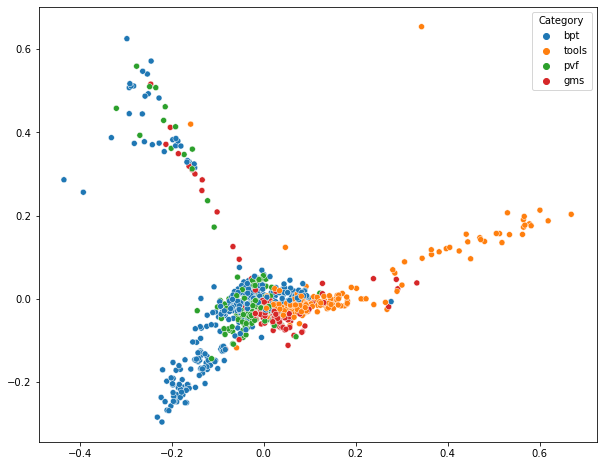

In [113]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = mat_desc,x =Y_sklearn[:, 1] , y=Y_sklearn[:, 2],hue = "Category")

plt.show()

[Text(0.5, 1.0, 'COUNTPLOT OF OUTPUT VARIABLE')]

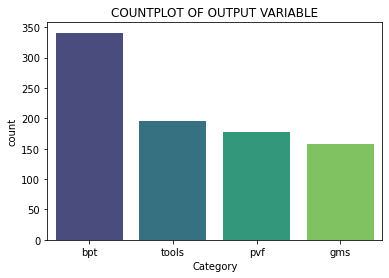

In [115]:
plt.figure(figsize = (6,4))
sns.countplot (x = "Category",data = mat_desc, palette= 'viridis').set(title = 'COUNTPLOT OF OUTPUT VARIABLE')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from collections import Counter


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
 

from sklearn.metrics import cohen_kappa_score

In [33]:
# Import label encoder 
from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(mat_desc['Category'])
# le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print(le_name_mapping)

In [120]:
mat_desc['Label'] = mat_desc['Category'].map(le_name_mapping, na_action='ignore')

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_1449/3425396788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mat_desc['Label'] = mat_desc['Category'].map(le_name_mapping, na_action='ignore')


In [122]:
y = pd.DataFrame(mat_desc['Label'])

In [123]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(tf_idf_array,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

In [124]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (697, 20000)
X_test shape: (175, 20000)
y_train shape: (697, 1)
y_test shape: (175, 1)


In [125]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [126]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

In [132]:
reg = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=1000)

accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

Train Score: 0.8508838643371017
Test Score: 0.8628571428571429
Cohen Kappa Score: 0.8067010309278351
[[67  0  3  0]
 [ 5 24  2  3]
 [ 4  2 29  1]
 [ 3  1  0 31]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        70
           1       0.89      0.71      0.79        34
           2       0.85      0.81      0.83        36
           3       0.89      0.89      0.89        35

    accuracy                           0.86       175
   macro avg       0.87      0.84      0.85       175
weighted avg       0.86      0.86      0.86       175



In [133]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

Train Score: 0.4648406988694759
Test Score: 0.6514285714285715
Cohen Kappa Score: 0.4676606991472597
[[69  0  1  0]
 [21 12  0  1]
 [21  1 14  0]
 [16  0  0 19]]
              precision    recall  f1-score   support

           0       0.54      0.99      0.70        70
           1       0.92      0.35      0.51        34
           2       0.93      0.39      0.55        36
           3       0.95      0.54      0.69        35

    accuracy                           0.65       175
   macro avg       0.84      0.57      0.61       175
weighted avg       0.78      0.65      0.63       175



In [134]:
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)

Train Score: 0.6786742034943474
Test Score: 0.35428571428571426
Cohen Kappa Score: 0.1744593804792519
[[ 8  4  1 57]
 [ 6 13  3 12]
 [ 2  7  6 21]
 [ 0  0  0 35]]
              precision    recall  f1-score   support

           0       0.50      0.11      0.19        70
           1       0.54      0.38      0.45        34
           2       0.60      0.17      0.26        36
           3       0.28      1.00      0.44        35

    accuracy                           0.35       175
   macro avg       0.48      0.42      0.33       175
weighted avg       0.48      0.35      0.30       175



In [135]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

Train Score: 0.8293216855087359
Test Score: 0.6571428571428571
Cohen Kappa Score: 0.4847637273664066
[[70  0  0  0]
 [16 12  0  6]
 [22  5  8  1]
 [10  0  0 25]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        70
           1       0.71      0.35      0.47        34
           2       1.00      0.22      0.36        36
           3       0.78      0.71      0.75        35

    accuracy                           0.66       175
   macro avg       0.77      0.57      0.58       175
weighted avg       0.74      0.66      0.61       175



In [136]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)

Train Score: 0.6871634121274408
Test Score: 0.6571428571428571
Cohen Kappa Score: 0.4876049189927777
[[67  1  2  0]
 [14 18  0  2]
 [25  4  5  2]
 [ 9  1  0 25]]
              precision    recall  f1-score   support

           0       0.58      0.96      0.72        70
           1       0.75      0.53      0.62        34
           2       0.71      0.14      0.23        36
           3       0.86      0.71      0.78        35

    accuracy                           0.66       175
   macro avg       0.73      0.58      0.59       175
weighted avg       0.70      0.66      0.61       175



In [137]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train

Score
Logistic Train Score       0.850884
SVM Train Score            0.464841
Decision Tree Train Score  0.678674
Random Forest Train Score  0.829322
Gaussian NB Train Score    0.687163

In [138]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test


Score
Logistic Test Score       0.862857
SVM Test Score            0.651429
Decision Tree Test Score  0.354286
Random Forest Test Score  0.657143
Gaussian NB Test Score    0.657143

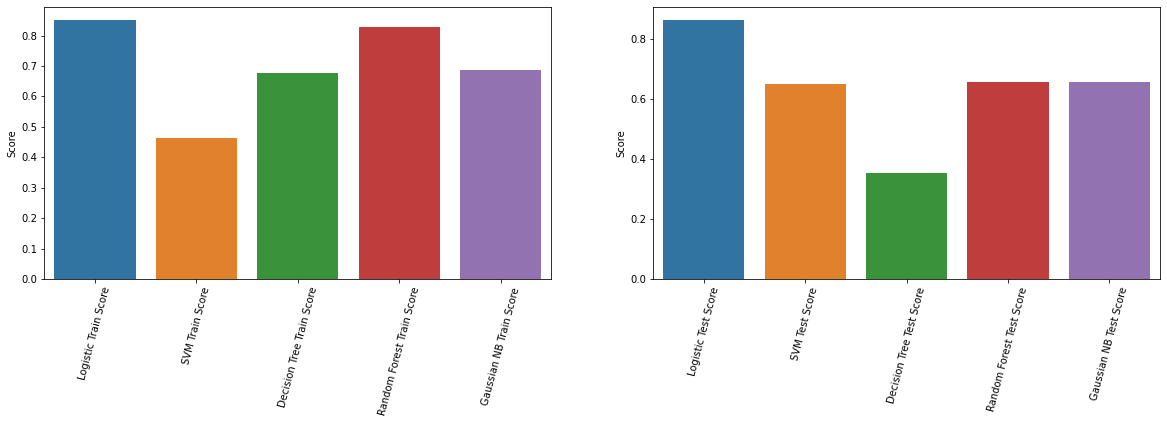

In [139]:
import seaborn as sns
 
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()


## NLP Tokenizer

In [ ]:
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#mat_desc = pd.read_csv("Dataset/query_result_2022-11-17T22_15_15.252605Z.csv")
mat_desc = pd.read_csv("Dataset/Mat_desc.csv")

In [218]:
mat_desc = mat_desc.merge(mat_grp_mapping,how = 'left',left_on = 'material_group',right_on = 'material_group')
mat_desc.drop(columns = ['Unnamed: 0'],axis = 0,inplace = True)
mat_desc.rename(columns= {'Category L1':'Category'},inplace = True)


In [219]:
mat_desc.dropna(inplace = True)
mat_desc = mat_desc.reset_index(drop=True)

In [220]:
mat_desc

material_group  \
0     1440-OTHER ROL.BRG.MTD.UNITS   
1                 3691-CHAIN CPLGS   
2             LIQ FUELS,PROPNE CYL   
3      6088-UNCODED HYD COMPONENTS   
4      4024-MATS AND AREA GUARDING   
...                            ...   
1702          BEARING,PILLOW BLOCK   
1703               SWITCH,POSITION   
1704                   NOZZLE,GNRL   
1705               PUMP,WEAR PLATE   
1706   4401-FABRICATED RUBBER BELT   

                                  material_descriptions             Category  
0     ["ZAMUI6-2","QB9AB9-5/8","QF9GC9-16-LK","QB6AA...                  BPT  
1     ["D4018 X 1-1/4 5/16 X 5/32 KW 1-SS CPLG","DRC...                  BPT  
2     ["LIQ FUELS,PROPNE CYL333670PRPNE, 14.1OZ, 228...                Fuels  
3     ["S60X81247 - CENTER GASKET","P169071 STRAINER...            HYD & PNE  
4     ["W397222104 RH DOOR","25NWUSTZ100 PER PACK","...               Safety  
...                                                 ...                  ...  
1702  ["BEARING,PILLOW BLOCK,VAS 1-11/16,BEARING, PI...                  BPT  
1703  ["SWITCH,POSITION,800FM-SM22,MAINTAINED SELECT...  Electrical Supplies  
1704  ["NOZZLE,GNRL3220160.016IN, HOT MELT","NOZZLE,...                  PVF  
1705  ["PUMP,WEAR PLATE,R56091,MODULE WEAR PLATE  GL...                Pumps  
1706  ["PVC V GUIDE 'B' SECTION WHITE NOTCHED","PVC ...                  BPT  

[1707 rows x 3 columns]

In [224]:
# for i in tqdm(range(5,mat_desc.shape[0])):
#               mat_desc['material_descriptions'][i]= tqdm(nlp.tokenize(str(mat_desc['material_descriptions'][i])))


# More than 2 Features

In [305]:
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#mat_desc = pd.read_csv("Dataset/query_result_2022-11-17T22_15_15.252605Z.csv")
mat_desc = pd.read_csv("Dataset/Mat_desc.csv")

mat_desc = mat_desc.merge(mat_grp_mapping,how = 'left',left_on = 'material_group',right_on = 'material_group')
mat_desc.drop(columns = ['Unnamed: 0'],axis = 0,inplace = True)
mat_desc.rename(columns= {'Category L1':'Category'},inplace = True)

mat_desc.dropna(inplace = True)
mat_desc = mat_desc.reset_index(drop=True)

In [306]:
mat_desc['Category'] = [change_lower(str(x)) for x in mat_desc['Category']]
mat_desc['material_group'] = [change_lower(str(x)) for x in mat_desc['material_group']]


In [307]:
mat_desc = mat_desc[(mat_desc['Category'] =='bpt') | (mat_desc['Category'] =='tools') | (mat_desc['Category'] =='pvf')| (mat_desc['Category'] =='gms')]

In [308]:
mat_desc['material_descriptions'] = [change_lower(str(x)) for x in mat_desc['material_descriptions']]
mat_desc['material_descriptions'] = [clean_data(str(x)) for x in mat_desc['material_descriptions']]
mat_desc['material_descriptions'] = [remover(str(x)) for x in mat_desc['material_descriptions']]

In [309]:
mat_desc['material_group'] = [clean_data(str(x)) for x in mat_desc['material_group']]
mat_desc['material_group'] = [remover(str(x)) for x in mat_desc['material_group']]

In [310]:
mat_desc

material_group  \
0            rol brg mtd units   
1                  chain cplgs   
6               pulley lagging   
7       adjustable fhp sheaves   
8     insul  pliers  strippers   
...                        ...   
1696             planer knives   
1700          washer mech gnrl   
1702      bearing pillow block   
1704               nozzle gnrl   
1706    fabricated rubber belt   

                                  material_descriptions Category  
0     [zamui qbab  qfgclk qbaa qbgb  qbaa  qbgdlk qf...      bpt  
1     [d x     x   kw ss cplg drc   x   cc  coupling...      bpt  
6     [ slide lag style  \ double retainer style  sl...      bpt  
7     [  taperlock bushing akh bushed sheave  sheave...      bpt  
8     [wsh  wire crimper cutter  c stmlt std ga  \ n...    tools  
...                                                 ...      ...  
1696  [ type kf blade spec    x  x   hsshigh speed p...    tools  
1700  [washer mech gnrl sam washer washer mech gnrl ...      bpt  
1702  [bearing pillow block vas   bearing  pillow bl...      bpt  
1704  [nozzle gnrl  hot melt nozzle gnrl  \b\ white ...      pvf  
1706  [pvc v guide b section white notched pvc vguid...      bpt  

[872 rows x 3 columns]

In [311]:
data = mat_desc['material_descriptions']


tf_idf_vectorizor_1 = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf_vectorizor_1.fit(data)
tf_idf_1 =tf_idf_vectorizor_1.transform(data)
tf_idf_norm_1 = normalize(tf_idf_1)
tf_idf_array_1 = tf_idf_norm_1.toarray()

data = mat_desc['material_group']


tf_idf_vectorizor_2 = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 1000)
tf_idf_vectorizor_2.fit(data)
tf_idf_2 =tf_idf_vectorizor_2.transform(data)
tf_idf_norm_2 = normalize(tf_idf_2)
tf_idf_array_2 = tf_idf_norm_2.toarray()

In [370]:
tf_idf_array_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [313]:
import scipy as sp
X = sp.hstack([tf_idf_array_1,tf_idf_array_2])

In [314]:

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X)

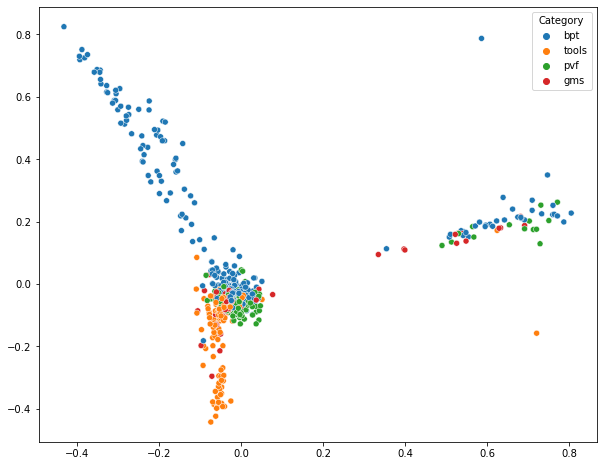

In [315]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = mat_desc,x =Y_sklearn[:, 0] , y=Y_sklearn[:, 1],hue = "Category")

plt.show()

In [256]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

In [257]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (697, 20828)
X_test shape: (175, 20828)
y_train shape: (697, 1)
y_test shape: (175, 1)


In [258]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [259]:
reg = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=1000)

accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

Train Score: 0.8608838643371017
Test Score: 0.8457142857142858
Cohen Kappa Score: 0.7821777613866863
[[66  0  4  0]
 [ 6 23  2  3]
 [ 4  3 28  1]
 [ 4  0  0 31]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        70
           1       0.88      0.68      0.77        34
           2       0.82      0.78      0.80        36
           3       0.89      0.89      0.89        35

    accuracy                           0.85       175
   macro avg       0.85      0.82      0.83       175
weighted avg       0.85      0.85      0.84       175



In [260]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

Train Score: 0.4662589928057554
Test Score: 0.6514285714285715
Cohen Kappa Score: 0.46755449149583517
[[69  0  1  0]
 [23 10  0  1]
 [19  1 16  0]
 [16  0  0 19]]
              precision    recall  f1-score   support

           0       0.54      0.99      0.70        70
           1       0.91      0.29      0.44        34
           2       0.94      0.44      0.60        36
           3       0.95      0.54      0.69        35

    accuracy                           0.65       175
   macro avg       0.84      0.57      0.61       175
weighted avg       0.78      0.65      0.63       175



In [262]:
dtc = DecisionTreeClassifier(random_state = 42,criterion="entropy", max_depth=2)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)

Train Score: 0.6284789311408017
Test Score: 0.33714285714285713
Cohen Kappa Score: 0.17281284381239548
[[ 0  6  0 64]
 [ 0 24  0 10]
 [ 0 11  0 25]
 [ 0  0  0 35]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.59      0.71      0.64        34
           2       0.00      0.00      0.00        36
           3       0.26      1.00      0.41        35

    accuracy                           0.34       175
   macro avg       0.21      0.43      0.26       175
weighted avg       0.17      0.34      0.21       175



In [263]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

Train Score: 0.8450976361767729
Test Score: 0.6971428571428572
Cohen Kappa Score: 0.5496261046906866
[[70  0  0  0]
 [12 17  0  5]
 [22  5  8  1]
 [ 8  0  0 27]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        70
           1       0.77      0.50      0.61        34
           2       1.00      0.22      0.36        36
           3       0.82      0.77      0.79        35

    accuracy                           0.70       175
   macro avg       0.80      0.62      0.63       175
weighted avg       0.77      0.70      0.66       175



In [264]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)

Train Score: 0.7029701952723535
Test Score: 0.7428571428571429
Cohen Kappa Score: 0.6258374115075782
[[67  1  2  0]
 [10 21  1  2]
 [18  4 13  1]
 [ 4  2  0 29]]
              precision    recall  f1-score   support

           0       0.68      0.96      0.79        70
           1       0.75      0.62      0.68        34
           2       0.81      0.36      0.50        36
           3       0.91      0.83      0.87        35

    accuracy                           0.74       175
   macro avg       0.79      0.69      0.71       175
weighted avg       0.76      0.74      0.72       175



## Testing on Unseen Data

In [426]:
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#mat_desc = pd.read_csv("Dataset/query_result_2022-11-17T22_15_15.252605Z.csv")
mat_desc = pd.read_csv("Dataset/Mat_desc.csv")

mat_desc = mat_desc.merge(mat_grp_mapping,how = 'left',left_on = 'material_group',right_on = 'material_group')
mat_desc.drop(columns = ['Unnamed: 0'],axis = 0,inplace = True)
mat_desc.rename(columns= {'Category L1':'Category'},inplace = True)

In [427]:
mat_desc = mat_desc[mat_desc['Category'].isnull()]

In [428]:
mat_desc

material_group                              material_descriptions  \
0              24477  ["RING, CPLG GUIDE SPRING FALK 340588","SEAL K...   
1          300408031  ["SUPORTE MONT P/RELE;SIEMENS;3RU19363AA01","S...   
2            C69-700  ["HEATER              OVERLOAD","HEATER       ...   
3          120402077  ["ANEL;DO ANAL CO2 ANTON;ANTON PAAR/17522","AN...   
4            1040100  ["BEARING,BALL NO.1315 #02 (SKF)","BEARING,620...   
...              ...                                                ...   
20459        C10-290                             ["SCREW, SOCKET HEAD"]   
20460        C23-320                      ["BRONZE-SOLID        ROUND"]   
20461       27121600  ["2.50CBB2ANLU18AC8.00","DSBC-80-800-PPVA-N3",...   
20462  SCREW,DRYWALL  ["SCREW,DRYWALL32158DRY WALL,BUGLE,1.625 IN,",...   
20463          69866  ["INDICATOR, BURST 6IN ZOOK BA0150-0150-01","I...   

      Category  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
20459      NaN  
20460      NaN  
20461      NaN  
20462      NaN  
20463      NaN  

[18757 rows x 3 columns]

In [429]:
mat_desc['material_group_new'] = [change_lower(str(x)) for x in mat_desc['material_group']]
mat_desc['material_group_new'] = [clean_data(str(x)) for x in mat_desc['material_group_new']]
mat_desc['material_group_new'] = [remover(str(x)) for x in mat_desc['material_group_new']]

In [430]:
mat_desc['material_descriptions_new'] = [change_lower(str(x)) for x in mat_desc['material_descriptions']]
mat_desc['material_descriptions_new'] = [clean_data(str(x)) for x in mat_desc['material_descriptions_new']]
mat_desc['material_descriptions_new'] = [remover(str(x)) for x in mat_desc['material_descriptions_new']]

In [431]:
mat_desc

material_group                              material_descriptions  \
0              24477  ["RING, CPLG GUIDE SPRING FALK 340588","SEAL K...   
1          300408031  ["SUPORTE MONT P/RELE;SIEMENS;3RU19363AA01","S...   
2            C69-700  ["HEATER              OVERLOAD","HEATER       ...   
3          120402077  ["ANEL;DO ANAL CO2 ANTON;ANTON PAAR/17522","AN...   
4            1040100  ["BEARING,BALL NO.1315 #02 (SKF)","BEARING,620...   
...              ...                                                ...   
20459        C10-290                             ["SCREW, SOCKET HEAD"]   
20460        C23-320                      ["BRONZE-SOLID        ROUND"]   
20461       27121600  ["2.50CBB2ANLU18AC8.00","DSBC-80-800-PPVA-N3",...   
20462  SCREW,DRYWALL  ["SCREW,DRYWALL32158DRY WALL,BUGLE,1.625 IN,",...   
20463          69866  ["INDICATOR, BURST 6IN ZOOK BA0150-0150-01","I...   

      Category material_group_new  \
0          NaN                      
1          NaN                      
2          NaN                  c   
3          NaN                      
4          NaN                      
...        ...                ...   
20459      NaN                  c   
20460      NaN                  c   
20461      NaN                      
20462      NaN      screw drywall   
20463      NaN                      

                               material_descriptions_new  
0      [ring  cplg guide spring falk  seal kit  cplg ...  
1      [suporte mont p rele;siemens;ruaa soporte p de...  
2      [heater              overload heater          ...  
3      [anel;do anal co anton;anton paar  anel o;borr...  
4      [bearing ball    skf  bearing  c skf bearing  ...  
...                                                  ...  
20459                               [screw  socket head]  
20460                         [bronzesolid        round]  
20461  [ cbbanluac  dsbcppvan rodmmfay   saahpvxrsk  ...  
20462  [screw drywalldry wall bugle    screw  drywall...  
20463  [indicator  burst zook ba indicator  burst zoo...  

[18757 rows x 5 columns]

mat_desc.reset_index(drop=True,inplace = True)

In [432]:
np.where(mat_desc.applymap(lambda x: x == ''))

(array([    0,     1,     3, ..., 18750, 18754, 18756]),
 array([3, 3, 3, ..., 3, 3, 3]))

In [433]:
mat_desc = mat_desc.replace('', np.nan)
mat_desc.drop(columns = ['Category'],inplace = True)
mat_desc.dropna(inplace = True)
mat_desc.reset_index(drop=True,inplace = True)


In [434]:
mat_desc

material_group                              material_descriptions  \
0           C69-700  ["HEATER              OVERLOAD","HEATER       ...   
1          C92-1418              ["BOLT       STAY","BOLT       STAY"]   
2          C92-1422  ["SHAFT, ROLLER","SHAFT, DRIVE","COLLAR       ...   
3             EAA15                 ["Linde H 30t Gas Forklift Truck"]   
4          C70-6434  ["TIMER, RESET","CONTROLLER          PHOTOELEC...   
...             ...                                                ...   
7441       C92-1321                     ["SEAL, OIL","RING, RETAINER"]   
7442       C38-6541  ["SPINDLE, LET-OFF","NUMBER              MARKI...   
7443        C10-290                             ["SCREW, SOCKET HEAD"]   
7444        C23-320                      ["BRONZE-SOLID        ROUND"]   
7445  SCREW,DRYWALL  ["SCREW,DRYWALL32158DRY WALL,BUGLE,1.625 IN,",...   

     material_group_new                          material_descriptions_new  
0                     c  [heater              overload heater          ...  
1                     c                  [bolt       stay bolt       stay]  
2                     c  [shaft  roller shaft  drive collar            ...  
3                   eaa                       [linde h gas forklift truck]  
4                     c  [timer  reset controller          photoelectri...  
...                 ...                                                ...  
7441                  c                         [seal  oil ring  retainer]  
7442                  c  [spindle  letoff number              marking s...  
7443                  c                               [screw  socket head]  
7444                  c                         [bronzesolid        round]  
7445      screw drywall  [screw drywalldry wall bugle    screw  drywall...  

[7446 rows x 4 columns]

In [435]:
tf_idf_vectorizor_2 = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 828)

In [436]:
data = mat_desc['material_descriptions_new']
tf_idf_3 = tf_idf_vectorizor_1.transform(data)
tf_idf_norm_3 = normalize(tf_idf_3)
tf_idf_array_3 = tf_idf_norm_3.toarray()
data = mat_desc['material_group_new']
tf_idf_4 = tf_idf_vectorizor_2.transform(data)
tf_idf_norm_4 = normalize(tf_idf_4)
tf_idf_array_4 = tf_idf_norm_4.toarray()

In [437]:
X_test = sp.hstack([tf_idf_array_3,tf_idf_array_4])

In [438]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.transform(X_test)

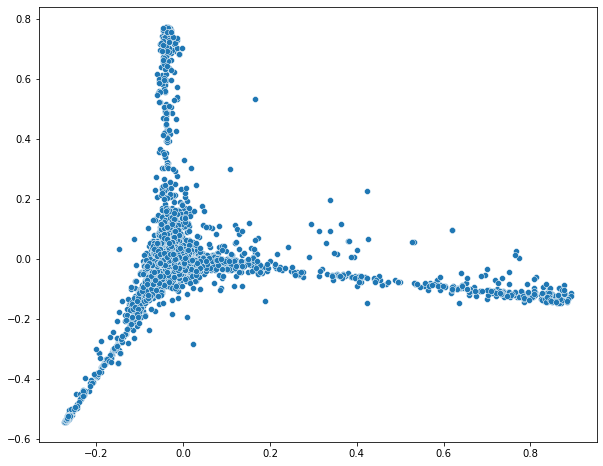

In [439]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = mat_desc,x =Y_sklearn[:, 0] , y=Y_sklearn[:, 1])

plt.show()

In [440]:
X_test = sc.transform(X_test)

In [441]:
y_pred = reg.predict(X_test)

In [442]:
from collections import Counter
Counter(y_pred)

Counter({2: 1183, 0: 3948, 3: 1246, 1: 1069})

In [443]:
le_name_mapping

{'bpt': 0, 'gms': 1, 'pvf': 2, 'tools': 3}

In [444]:
mat_desc['Label'] = y_pred

In [445]:
dict2 = {0:'bpt',1:'gms',2:'pvf',3:'tools'}

In [446]:
mat_desc['Label'] = [dict2[i] for i in mat_desc['Label']]

In [447]:
mat_desc

material_group                              material_descriptions  \
0           C69-700  ["HEATER              OVERLOAD","HEATER       ...   
1          C92-1418              ["BOLT       STAY","BOLT       STAY"]   
2          C92-1422  ["SHAFT, ROLLER","SHAFT, DRIVE","COLLAR       ...   
3             EAA15                 ["Linde H 30t Gas Forklift Truck"]   
4          C70-6434  ["TIMER, RESET","CONTROLLER          PHOTOELEC...   
...             ...                                                ...   
7441       C92-1321                     ["SEAL, OIL","RING, RETAINER"]   
7442       C38-6541  ["SPINDLE, LET-OFF","NUMBER              MARKI...   
7443        C10-290                             ["SCREW, SOCKET HEAD"]   
7444        C23-320                      ["BRONZE-SOLID        ROUND"]   
7445  SCREW,DRYWALL  ["SCREW,DRYWALL32158DRY WALL,BUGLE,1.625 IN,",...   

     material_group_new                          material_descriptions_new  \
0                     c  [heater              overload heater          ...   
1                     c                  [bolt       stay bolt       stay]   
2                     c  [shaft  roller shaft  drive collar            ...   
3                   eaa                       [linde h gas forklift truck]   
4                     c  [timer  reset controller          photoelectri...   
...                 ...                                                ...   
7441                  c                         [seal  oil ring  retainer]   
7442                  c  [spindle  letoff number              marking s...   
7443                  c                               [screw  socket head]   
7444                  c                         [bronzesolid        round]   
7445      screw drywall  [screw drywalldry wall bugle    screw  drywall...   

      Label  
0       pvf  
1       bpt  
2     tools  
3     tools  
4     tools  
...     ...  
7441    bpt  
7442    bpt  
7443    pvf  
7444    bpt  
7445    bpt  

[7446 rows x 5 columns]

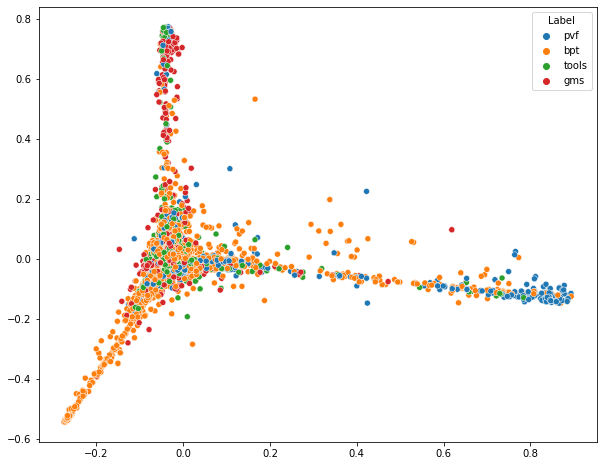

In [448]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = mat_desc,x =Y_sklearn[:, 0] , y=Y_sklearn[:, 1],hue = "Label")

plt.show()

## Including Other Category

In [17]:
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#mat_desc = pd.read_csv("Dataset/query_result_2022-11-17T22_15_15.252605Z.csv")
mat_desc = pd.read_csv("Dataset/Mat_desc.csv")

In [18]:
mat_desc = mat_desc.merge(mat_grp_mapping,how = 'left',left_on = 'material_group',right_on = 'material_group')
mat_desc.drop(columns = ['Unnamed: 0'],axis = 0,inplace = True)
mat_desc.rename(columns= {'Category L1':'Category'},inplace = True)


In [19]:
mat_desc.dropna(inplace = True)
mat_desc = mat_desc.reset_index(drop=True)

In [20]:
mat_desc['Category'] = [change_lower(str(x)) for x in mat_desc['Category']]
mat_desc['material_group'] = [change_lower(str(x)) for x in mat_desc['material_group']]


In [21]:
mat_desc['Category'].loc[~mat_desc['Category'].isin(['bpt','tools','pvf','gms','electrical supplies'])] = 'other'

In [22]:
mat_desc['Category'].value_counts()

other                  678
bpt                    341
tools                  195
pvf                    178
gms                    158
electrical supplies    157
Name: Category, dtype: int64

In [23]:
mat_desc['material_descriptions'] = [change_lower(str(x)) for x in mat_desc['material_descriptions']]
mat_desc['material_descriptions'] = [clean_data(str(x)) for x in mat_desc['material_descriptions']]
mat_desc['material_descriptions'] = [remover(str(x)) for x in mat_desc['material_descriptions']]

In [27]:
data = mat_desc['material_descriptions']


tf_idf_vectorizor_5 = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf_5 = tf_idf_vectorizor_5.fit_transform(data)
tf_idf_norm_5 = normalize(tf_idf_5)
tf_idf_array_5 = tf_idf_norm_5.toarray()

In [28]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array_5)

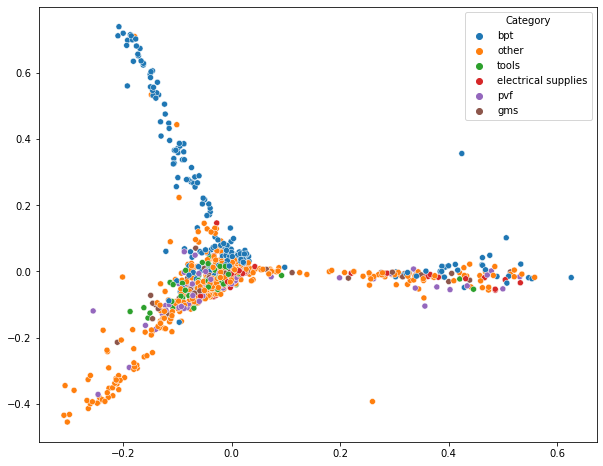

In [29]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = mat_desc,x =Y_sklearn[:, 0] , y=Y_sklearn[:, 1],hue = "Category")

plt.show()

[Text(0.5, 1.0, 'COUNTPLOT OF OUTPUT VARIABLE')]

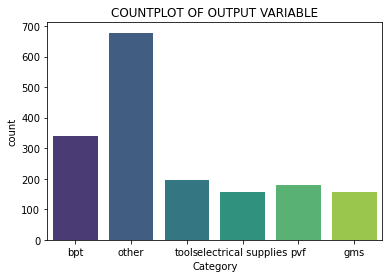

In [30]:
plt.figure(figsize = (6,4))
sns.countplot (x = "Category",data = mat_desc, palette= 'viridis').set(title = 'COUNTPLOT OF OUTPUT VARIABLE')

In [34]:
le = preprocessing.LabelEncoder()
le.fit(mat_desc['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'bpt': 0, 'electrical supplies': 1, 'gms': 2, 'other': 3, 'pvf': 4, 'tools': 5}


In [35]:
mat_desc['Label'] = mat_desc['Category'].map(le_name_mapping, na_action='ignore')

In [36]:
y = pd.DataFrame(mat_desc['Label'])

In [37]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(tf_idf_array_5,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

In [38]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1365, 20000)
X_test shape: (342, 20000)
y_train shape: (1365, 1)
y_test shape: (342, 1)


In [39]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
reg = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=1000)

accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

# #Store results in the dictionaries
# result_dict_train["Logistic Train Score"] = np.mean(accuracies)
# result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

Train Score: 0.7494505494505495
Test Score: 0.7690058479532164
Cohen Kappa Score: 0.6806835909800029
[[ 55   0   0  13   1   0]
 [  0  22   1   4   1   0]
 [  0   0  17  19   2   0]
 [ 10   4   0 121   3   1]
 [  1   0   0  12  24   0]
 [  0   0   0   7   0  24]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        69
           1       0.85      0.79      0.81        28
           2       0.94      0.45      0.61        38
           3       0.69      0.87      0.77       139
           4       0.77      0.65      0.71        37
           5       0.96      0.77      0.86        31

    accuracy                           0.77       342
   macro avg       0.84      0.72      0.76       342
weighted avg       0.79      0.77      0.76       342



In [42]:
logreg_coef = reg.coef_[0]

In [43]:
len(logreg_coef)

20000

In [44]:
tfidf_mapping = tf_idf_vectorizor_5.vocabulary_

In [45]:
tfidf_map = [(x,tfidf_mapping[x]) for x in tfidf_mapping]
tfidf_map.sort(key= lambda x:x[1])

In [46]:
tfidf_map[:10]

[('_cb', 0),
 ('aa', 1),
 ('aaa', 2),
 ('aaaa', 3),
 ('aaaaa', 4),
 ('aaaaaa', 5),
 ('aab', 6),
 ('aabr', 7),
 ('aabs', 8),
 ('aac', 9)]

In [48]:
# Balanced Weights:
reg = LogisticRegression(random_state = 42,solver='lbfgs', max_iter=1000,class_weight = 'balanced')

accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

# #Store results in the dictionaries
# result_dict_train["Logistic Train Score"] = np.mean(accuracies)
# result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

Train Score: 0.7604395604395604
Test Score: 0.7719298245614035
Cohen Kappa Score: 0.6861499364675985
[[ 55   0   0  13   1   0]
 [  0  22   1   4   1   0]
 [  0   0  18  18   2   0]
 [ 10   5   0 120   3   1]
 [  1   0   0  11  25   0]
 [  1   0   0   6   0  24]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        69
           1       0.81      0.79      0.80        28
           2       0.95      0.47      0.63        38
           3       0.70      0.86      0.77       139
           4       0.78      0.68      0.72        37
           5       0.96      0.77      0.86        31

    accuracy                           0.77       342
   macro avg       0.84      0.73      0.77       342
weighted avg       0.79      0.77      0.77       342



In [49]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))
print("Cohen Kappa Score:",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
# #Store results in the dictionaries
# result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
# result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

Train Score: 0.6959706959706959
Test Score: 0.652046783625731
Cohen Kappa Score: 0.4882364036466519
[[ 52   0   0  15   1   1]
 [  0  13   0  15   0   0]
 [  0   0   5  31   0   2]
 [  9   3   0 126   0   1]
 [  2   0   0  28   7   0]
 [  0   0   0  11   0  20]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        69
           1       0.81      0.46      0.59        28
           2       1.00      0.13      0.23        38
           3       0.56      0.91      0.69       139
           4       0.88      0.19      0.31        37
           5       0.83      0.65      0.73        31

    accuracy                           0.65       342
   macro avg       0.82      0.52      0.56       342
weighted avg       0.74      0.65      0.61       342



In [50]:
mat_desc

material_group  \
0     1440-other rol.brg.mtd.units   
1                 3691-chain cplgs   
2             liq fuels,propne cyl   
3      6088-uncoded hyd components   
4      4024-mats and area guarding   
...                            ...   
1702          bearing,pillow block   
1703               switch,position   
1704                   nozzle,gnrl   
1705               pump,wear plate   
1706   4401-fabricated rubber belt   

                                  material_descriptions             Category  \
0     [zamui qbab  qfgclk qbaa qbgb  qbaa  qbgdlk qf...                  bpt   
1     [d x     x   kw ss cplg drc   x   cc  coupling...                  bpt   
2     [liq fuels propne cylprpne   oz  psi  disposab...                other   
3     [sx  center gasket p strainer f valve therm  \...                other   
4     [w rh door nwustz per pack cnus cnnetz  fcpeg ...                other   
...                                                 ...                  ...   
1702  [bearing pillow block vas   bearing  pillow bl...                  bpt   
1703  [switch position fmsm maintained selector   po...  electrical supplies   
1704  [nozzle gnrl  hot melt nozzle gnrl  \b\ white ...                  pvf   
1705  [pump wear plate r module wear plate  glue rol...                other   
1706  [pvc v guide b section white notched pvc vguid...                  bpt   

      Label  
0         0  
1         0  
2         3  
3         3  
4         3  
...     ...  
1702      0  
1703      1  
1704      4  
1705      3  
1706      0  

[1707 rows x 4 columns]

## Testing on Unseen Data

In [51]:
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#mat_desc = pd.read_csv("Dataset/query_result_2022-11-17T22_15_15.252605Z.csv")
mat_desc = pd.read_csv("Dataset/Mat_desc.csv")

mat_desc = mat_desc.merge(mat_grp_mapping,how = 'left',left_on = 'material_group',right_on = 'material_group')
mat_desc.drop(columns = ['Unnamed: 0'],axis = 0,inplace = True)
mat_desc.rename(columns= {'Category L1':'Category'},inplace = True)

In [52]:
mat_desc = mat_desc[mat_desc['Category'].isnull()]

In [53]:
mat_desc['material_group_new'] = [change_lower(str(x)) for x in mat_desc['material_group']]
mat_desc['material_group_new'] = [clean_data(str(x)) for x in mat_desc['material_group_new']]
mat_desc['material_group_new'] = [remover(str(x)) for x in mat_desc['material_group_new']]

In [54]:
mat_desc['material_descriptions_new'] = [change_lower(str(x)) for x in mat_desc['material_descriptions']]
mat_desc['material_descriptions_new'] = [clean_data(str(x)) for x in mat_desc['material_descriptions_new']]
mat_desc['material_descriptions_new'] = [remover(str(x)) for x in mat_desc['material_descriptions_new']]

In [55]:
np.where(mat_desc.applymap(lambda x: x == ''))

(array([    0,     1,     3, ..., 18750, 18754, 18756]),
 array([3, 3, 3, ..., 3, 3, 3]))

In [56]:
mat_desc = mat_desc.replace('', np.nan)
mat_desc.drop(columns = ['Category'],inplace = True)
mat_desc.dropna(inplace = True)
mat_desc.reset_index(drop=True,inplace = True)

In [57]:
data = mat_desc['material_descriptions_new']
tf_idf_6 = tf_idf_vectorizor_5.transform(data)
tf_idf_norm_6 = normalize(tf_idf_6)
tf_idf_array_6 = tf_idf_norm_6.toarray()

In [58]:
X_test = tf_idf_array_6

In [60]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_test)

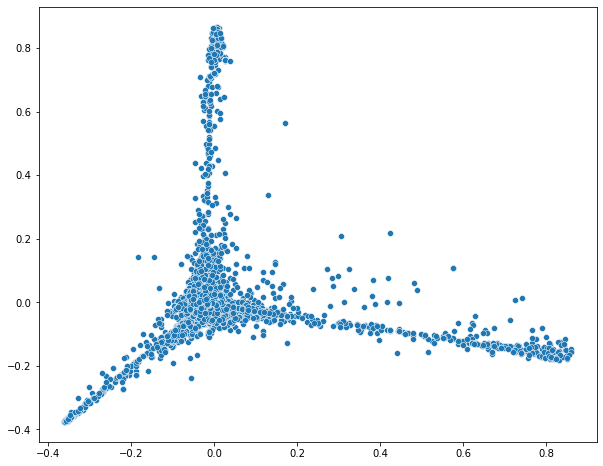

In [61]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = mat_desc,x =Y_sklearn[:, 0] , y=Y_sklearn[:, 1])

plt.show()

In [62]:
X_test = sc.transform(X_test)

In [63]:
y_pred = reg.predict(X_test)

In [64]:
from collections import Counter
Counter(y_pred)

Counter({1: 992, 2: 379, 0: 1154, 3: 4105, 4: 499, 5: 317})

In [65]:
le_name_mapping

{'bpt': 0,
 'electrical supplies': 1,
 'gms': 2,
 'other': 3,
 'pvf': 4,
 'tools': 5}

In [66]:
mat_desc['Label_1'] = y_pred

In [67]:
dict2 = {0:'bpt',1:'electrical supplies',2:'gms',3:'other',4:'pvf',5:'tools'}

In [68]:
mat_desc['Label'] = [dict2[i] for i in mat_desc['Label']]

KeyError: 'Label'

In [ ]:
mat_desc

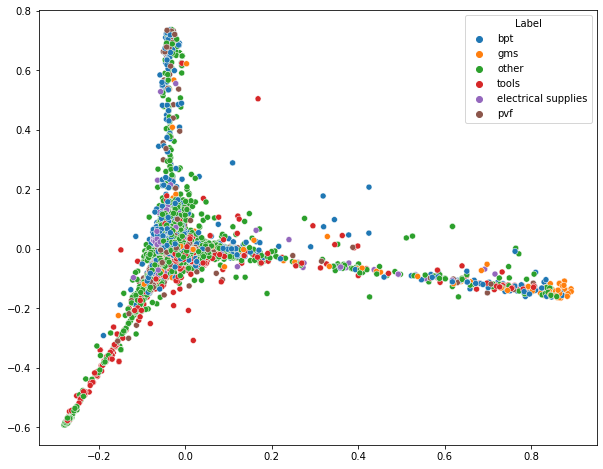

In [540]:
plt.figure(figsize = (10,8))
sns.color_palette("tab10")
sns.scatterplot(data = mat_desc,x =Y_sklearn[:, 0] , y=Y_sklearn[:, 1],hue = "Label")

plt.show()

In [541]:
sklearn_pca = PCA(n_components = 3)
Y_sklearn = sklearn_pca.transform(tf_idf_array_6)

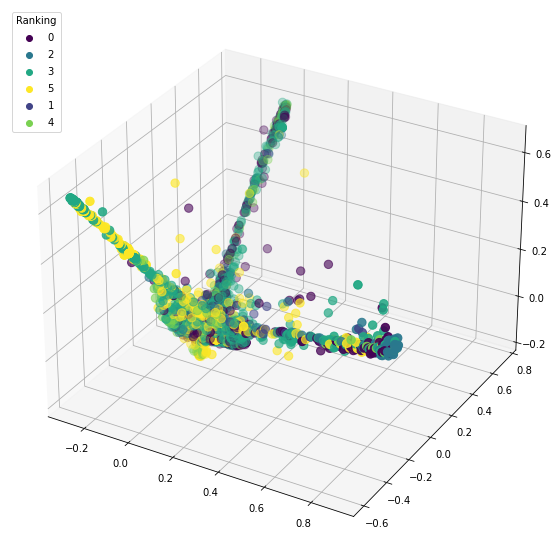

In [551]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(Y_sklearn[:,0], Y_sklearn[:,1], Y_sklearn[:,2], c=mat_desc.Label_1,s=70, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(num=mat_desc.Label_1.unique()),
                    loc="upper left", title="Ranking")
plt.show()